In [1]:
from EntityNameRetriever import EntityNameRetriever
from graph import graph_from_edgelist, remove_void_types
import networkx as nx
from CorpusManager import CorpusManager
import pickle
from utils import save_data_with_pickle, load_data_with_pickle
import time

In [2]:
# List of classes used to test the correctness of the workflow
LIST_OF_CLASSES = ['City', 'Mosque', 'Animal']
# PATH in which utility files are stored
PICKLES_PATH = '../../source_files/pickles/'

# PATH that refers to the file which let the building of the Ontology Graph
PATH_TO_EDGELIST = PICKLES_PATH + 'dbpedia_edgelist_no_closure.tsv'
# PATH to the corpus from which information are extracted
CORPUS_PATH = '/datahdd/vmanuel/ELMo/Corpora/shuffled_text_with_words'

In [3]:
try:
    G = load_data_with_pickle(PICKLES_PATH + 'graph')
except:
    G = graph_from_edgelist(PATH_TO_EDGELIST)
    save_data_with_pickle(PICKLES_PATH + 'graph', G)

# Check if the built graph is a tree (it should be a tree because we need to use an Ontology Tree)
print("the input graph is a tree: {}".format(nx.is_tree(G)))

the input graph is a tree: True


In [4]:
list_of_classes = [n for n in G.nodes()]


In [5]:
entity_dict = load_data_with_pickle(PICKLES_PATH + 'entity_dict')

In [6]:
void_types = [t for t, v in entity_dict.items() if v == []]

pruned_G = remove_void_types(G, void_types)
print("the pruned graph is a tree: {}".format(nx.is_tree(pruned_G)))

the pruned graph is a tree: True


In [7]:
len(void_types)

36

In [20]:
c = CorpusManager()
c.read_corpus(CORPUS_PATH, length = 15000)
c.create_all_entities(entity_dict, concepts=list_of_classes)

read input corpus


100%|██████████| 15000/15000 [00:01<00:00, 9193.42it/s]


In [21]:
lengths = [len(w.split(' ')) for w in c.all_entities]

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 18 artists>

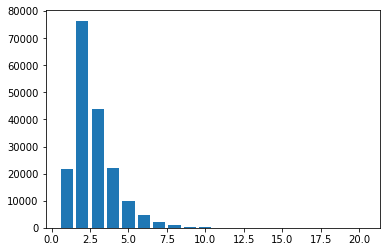

In [23]:
from collections import Counter
a = Counter(lengths)
plt.bar(a.keys(), a.values())

In [24]:
a

Counter({3: 44020,
         2: 76444,
         4: 21909,
         1: 21741,
         5: 10066,
         6: 4648,
         7: 1959,
         8: 884,
         9: 438,
         10: 207,
         11: 71,
         12: 48,
         16: 2,
         14: 10,
         15: 6,
         13: 3,
         18: 2,
         20: 1})

In [25]:
c.joined_corpus[10779].split(' ')[0]


'ngc'

In [26]:
c.joined_corpus[11125]

'georgy stepanovich shonin ukrainian august april born rovenky luhansk oblast now ukraine grew balta ukrainian ssr soviet cosmonaut flew soyuz space mission shonin part original group cosmonauts selected he left space programme medical reasons he later worked director th central scientific research institute ministry defence russia shonin died heart attack he awarded n hero soviet union n pilotcosmonaut ussr n order lenin n order october revolution n order red banner labour n order red star n ten commemorative medals n medal '

In [27]:
original = load_data_with_pickle('../../source_files/pickles/word_occurrence_index')

In [28]:
original

{'usa': [(39, [16, 22, 27, 58, 114]),
  (306, [9]),
  (421, [33]),
  (512, [21]),
  (592, [13]),
  (654, [9]),
  (768, [15]),
  (797, [49]),
  (837, [73]),
  (993, [6]),
  (1046, [22]),
  (1139, [12]),
  (1169, [40]),
  (1232, [10]),
  (1256, [47]),
  (1281, [634, 640]),
  (1315, [9]),
  (1439, [327, 332]),
  (1440, [21]),
  (1448, [13, 35]),
  (1528, [8]),
  (1540, [38]),
  (1763, [10]),
  (1837, [12]),
  (2010, [31]),
  (2051, [74]),
  (2110, [7]),
  (2115, [71, 75, 82, 90]),
  (2136, [11]),
  (2142, [12]),
  (2153, [9]),
  (2175, [14]),
  (2206, [42]),
  (2342, [42]),
  (2359, [11]),
  (2364, [9]),
  (2407, [6]),
  (2443, [253]),
  (2670, [15, 18]),
  (2682, [4]),
  (2731, [26]),
  (2760, [4, 75]),
  (2861, [5]),
  (2892, [8]),
  (3109, [8]),
  (3197, [6]),
  (3239, [11]),
  (3255, [20]),
  (3323, [113]),
  (3521, [42]),
  (3554, [27]),
  (4014, [12]),
  (4034, [32]),
  (4070, [13]),
  (4240, [19]),
  (4347, [8]),
  (4523, [27]),
  (4534, [9]),
  (4788, [128]),
  (4996, [15]),
  (51

In [112]:
entity_dict

{'MemberOfParliament': ['adam butler politician',
  'george stevenson british politician',
  'herb dhaliwal',
  'james parker labour politician',
  'jean melzer',
  'john diamond baron diamond',
  'john knight australian politician',
  'lianne dalziel',
  'pam beggs',
  'samuel mauger',
  'thomas hayward australian politician',
  'william hill australian politician',
  'adam brown canadian politician',
  'alan ridge',
  'alejandro rossi',
  'alok sharma',
  'anju dhillon',
  'anne marie trevelyan',
  'archie hamilton baron hamilton of epsom',
  'ashok kumar british politician',
  'barbara mcdougall',
  'beant singh chief minister',
  'bert hoare',
  'bill etherington',
  'brian fitzpatrick canadian politician',
  'cathcart wason',
  'cedric foo',
  'charles frazer politician',
  'charles henderson canadian politician',
  'cheryl kernot',
  'clifford forsythe',
  'd a rajapaksa',
  'darren hughes',
  'denham henty',
  'dilan perera',
  'edward evans australian politician',
  'edward hei

In [44]:
# create a unique dict
a_dict = {k:v for elem in a for k,v in elem.items()}
found_entities = set(a_dict.keys())

found_entity_dict = {k: set(v).intersection(found_entities) for k,v in entity_dict.items() if set(v).intersection(found_entities)}

In [45]:
found_entity_dict

{'Settlement': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'la ceiba',
  'liverpool',
  'philadelphia',
  'stade'},
 'City': {'angul',
  'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'ilo',
  'kladno',
  'koszalin',
  'la ceiba',
  'liverpool',
  'metropolis',
  'philadelphia',
  'stade'},
 'Town': {'stade'},
 'Animal': {'gunda'},
 'Insect': {'gunda'},
 'Place': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'liverpool',
  'philadelphia'},
 'PopulatedPlace': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'la ceiba',
  'liverpool',
  'philadelphia',
  'stade'}}